<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/argon/Notebook_Salida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Analisis de comportmiento de Uso del Oxigeno en Siderca***


---





In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image


### ***Esquema de flujo Praxair _ Siderca:***

---



In [ ]:
#@title "Ejecutar para recargar imagen"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Image('/content/drive/MyDrive/Colab Notebooks/ESQUEMA ENTRADA.jpg')

## ***Carga de datos y analisis rapidos***

---



In [2]:
#@title "Ejecutar Celda"
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/argon/Argonsep2023.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=",",decimal=".")
df=pd.DataFrame(datos)
dfx=df.copy()


In [4]:
#@title Analisis rapidos del data_set completo
a=np.array(round(dfx.FQI171.describe(),2))
b=np.array(round(dfx.PIR171.describe(),2))

h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI171","PIR171"])
ke=np.array([h,a,b])
dfD= pd.DataFrame(ke.T,columns=R)

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI171, R.PIR171],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )
TABLA1(dfD)
#@title Maximos y minimos de intervalo dado:
nvalue = 10 #@param {type:"number"}
Instrumento = 'FQI171' #@param {type:"raw"}
dfx = dfx #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)
dfmax

Analisis rapidos.


,indice,Date,Time,FQI171,PIR171
12890,12891,9/14/2023,9/14/2023 5:07,398.38,14.27
10947,10948,9/12/2023,9/12/2023 4:50,394.63,13.69
12889,12890,9/14/2023,9/14/2023 5:06,394.63,14.36
10958,10959,9/12/2023,9/12/2023 4:58,393.71,13.80
10959,10960,9/12/2023,9/12/2023 4:59,392.83,13.77
10957,10958,9/12/2023,9/12/2023 4:57,391.50,13.93
12897,12898,9/14/2023,9/14/2023 5:12,391.43,15.59
10946,10947,9/12/2023,9/12/2023 4:49,390.57,14.07
12896,12897,9/14/2023,9/14/2023 5:11,390.50,15.61
12884,12885,9/14/2023,9/14/2023 5:02,389.25,13.03


## ***Analisis de la dispersión CAUDAL VS PRESION en instrumentos de entreda (FQI161/PIR161)***

---



Cantidad de items sampleados:  17280
Fecha de la muestra:  9/1/2023 al 9/18/2023
Muestreo cada 1 minuto 30 seg 


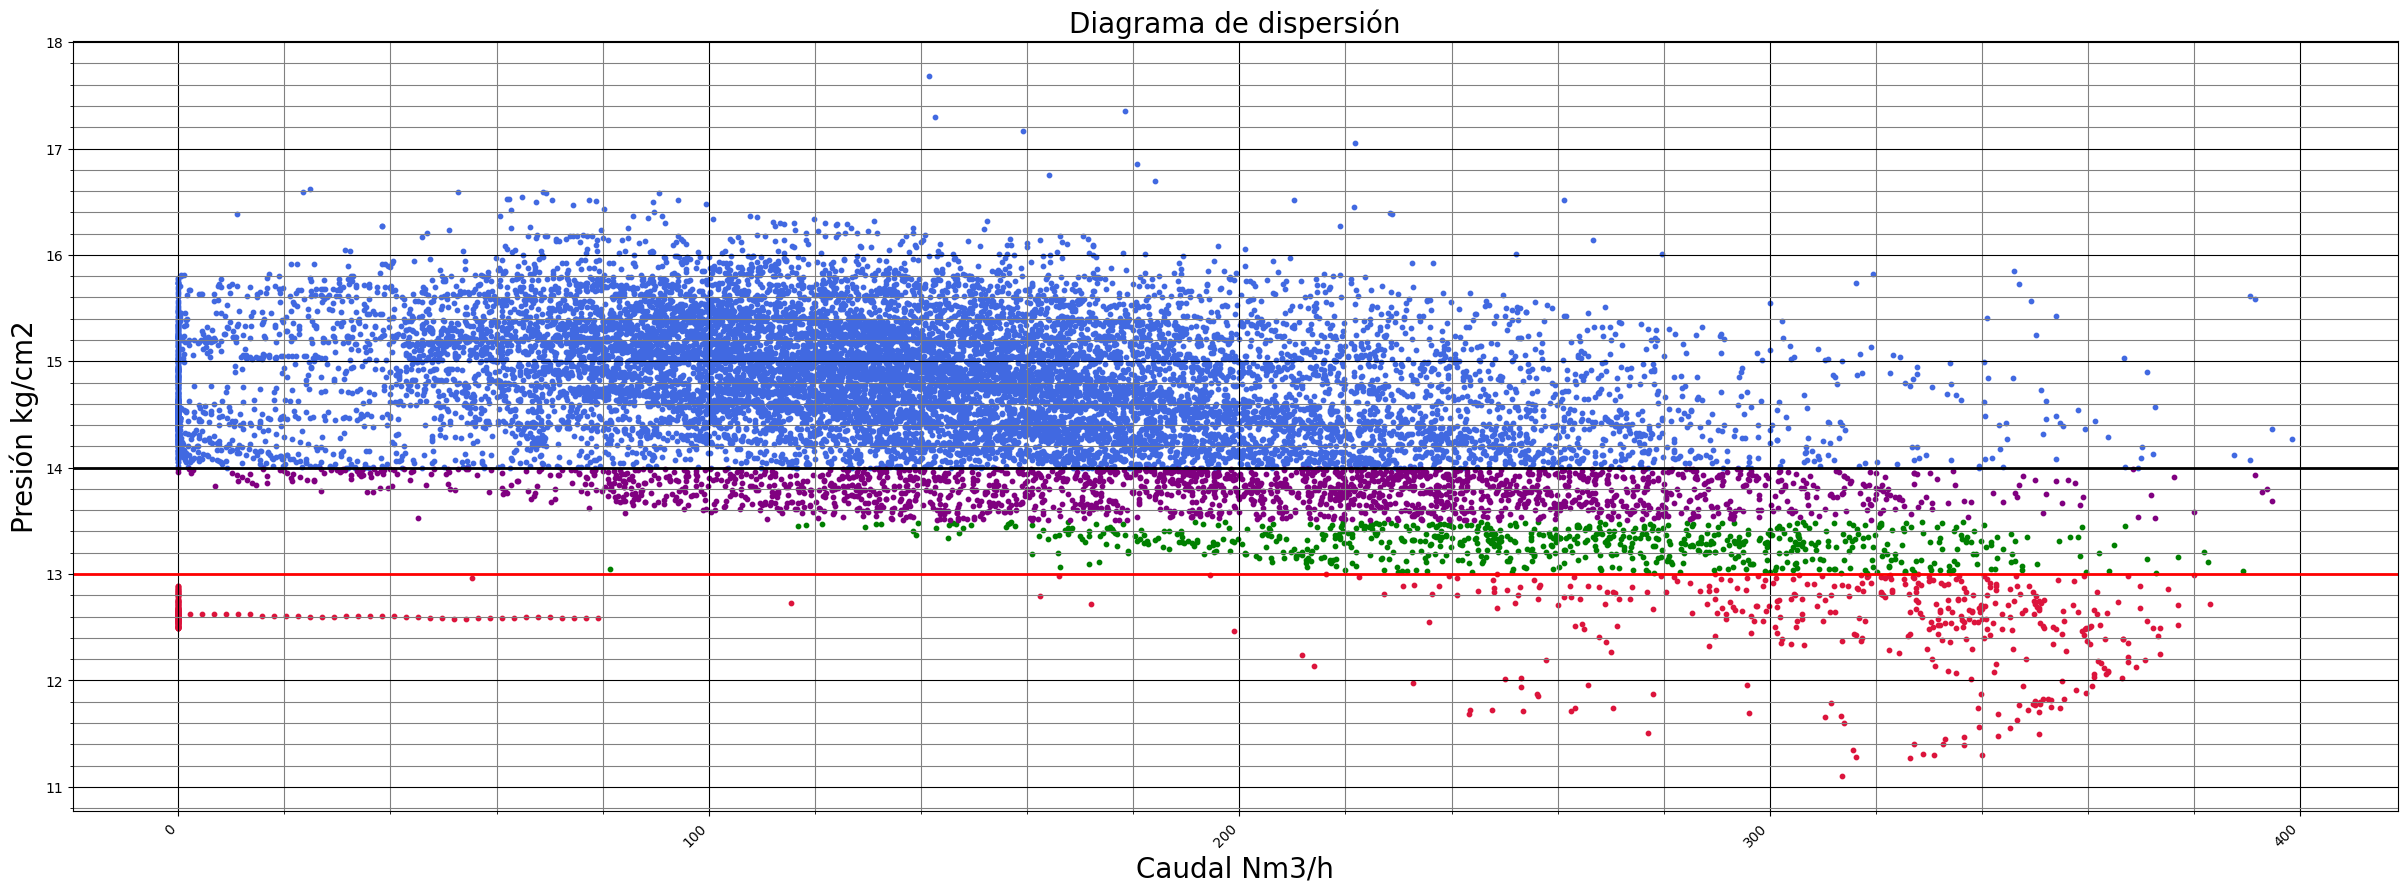

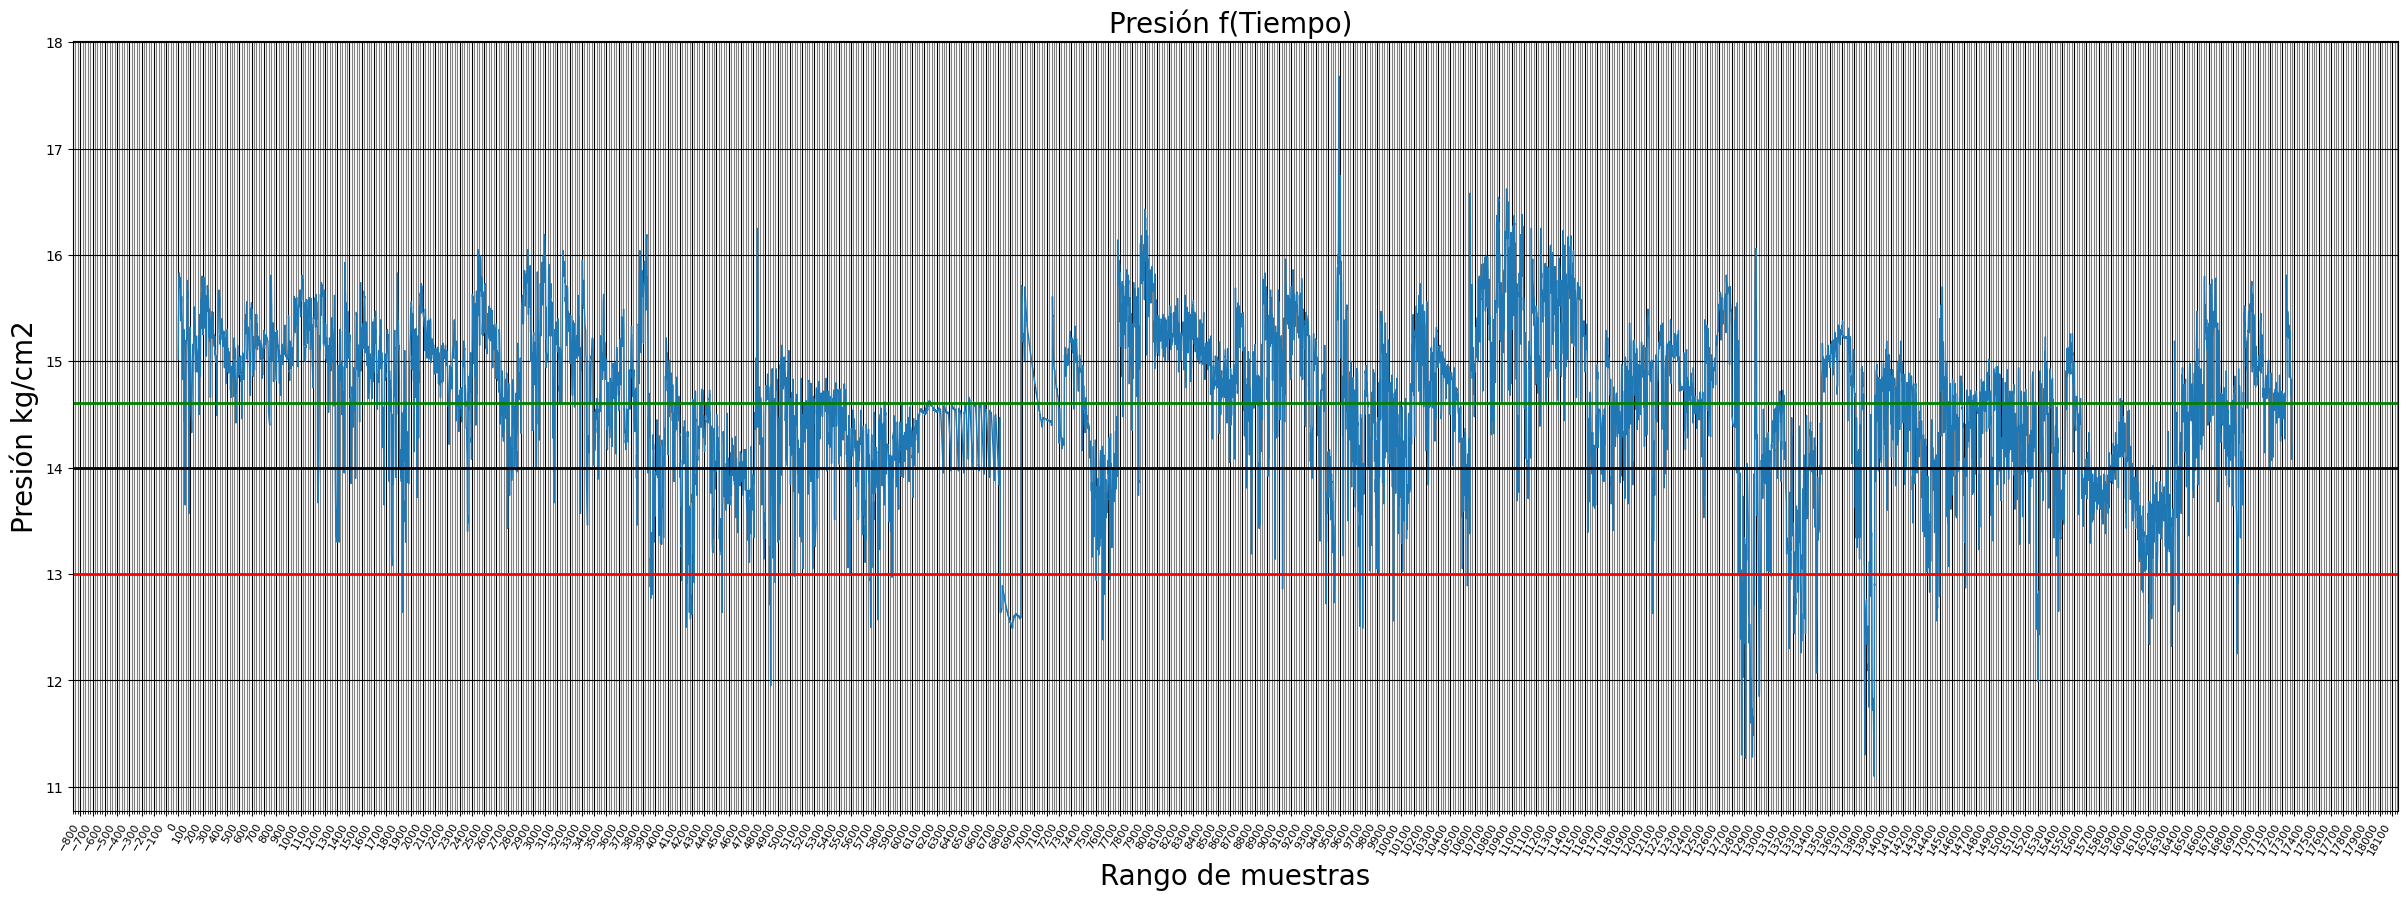

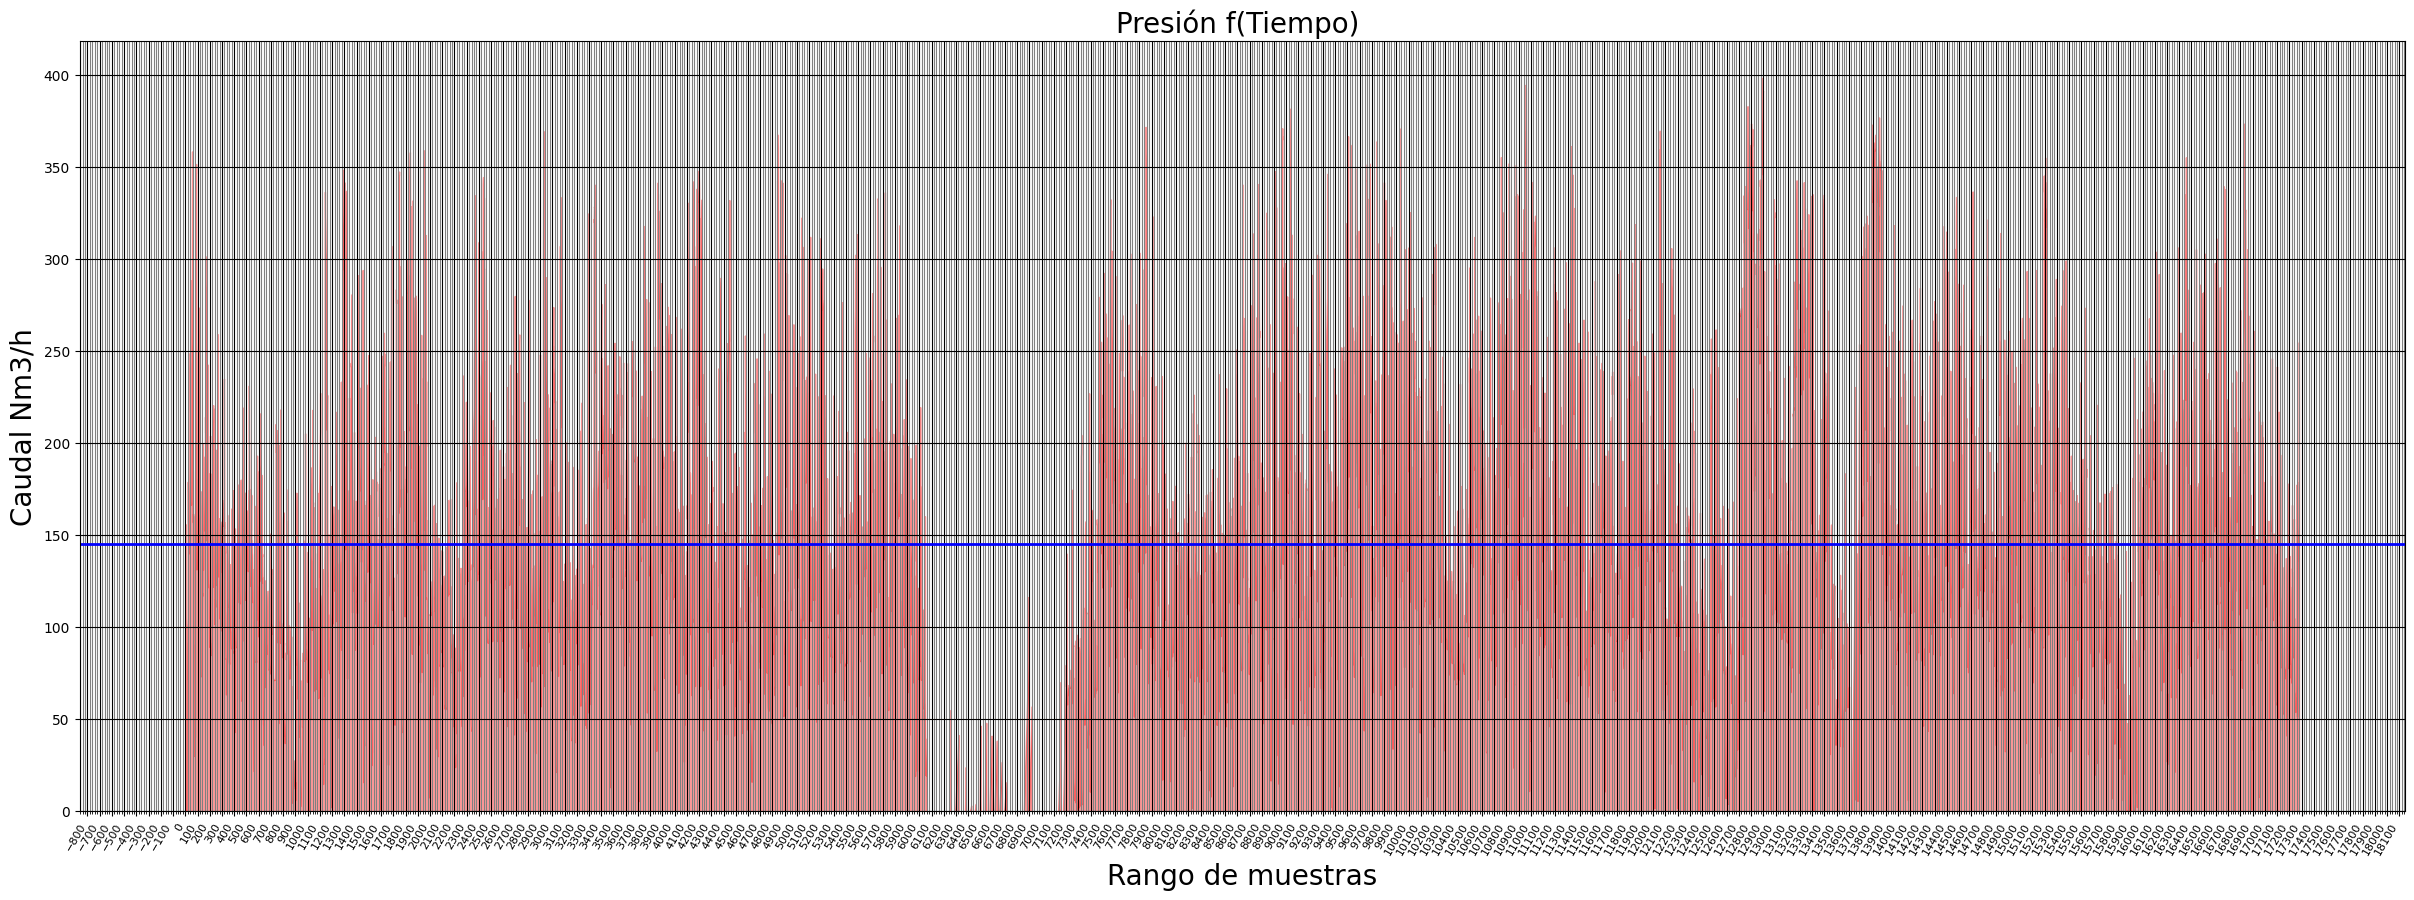

In [34]:

from io import DEFAULT_BUFFER_SIZE
#@title Seleccionar parametros y ejecuar celda

#Time=np.array((0,len(dfx.index)))
#np.array(dfx.Date.values+' '+str(dfx.hour.values))#+':'+str(dfx.minute.values)+':'+str(dfx.second.values))

InstrumentoParametro = 'PIR171' #@param {type:"raw"}
x = 'FQI171' #@param {type:"raw"}
y = 'PIR171' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
choice=False
Secciones = "13;13.5;14" #@param {type:"string"}
zoom = True
Intervalo = "14;14.2" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))
print('Cantidad de items sampleados: ', len(dfx.index))
print('Fecha de la muestra: ',dfx.Date[0], 'al',dfx.Date[(len(dfx.index)-1)])
print('Muestreo cada 1 minuto 30 seg ')

#------------------FIGURA 1
fig1, ax = plt.subplots(1, figsize=(30,10))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]

ax.set_xlabel(text,fontsize=20)
ax.set_ylabel(text1,fontsize=20)

ax.scatter(dfa[x],dfa[y],color='crimson',s=10,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=10,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=10,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=10,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
 # ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')

labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=10, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(100),)
ax.xaxis.set_minor_locator(MultipleLocator(20),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Diagrama de dispersión',fontsize=20)
ax.axhline(y=14,linewidth=2,color='black')
ax.axhline(y=13,linewidth=2,color='red')

#------------------figura 2
figB, (ax1)= plt.subplots(1, figsize=(30,10))
ax1.plot(dfx.index,dfx['PIR171'],linewidth=1)
ax1.set_title('Presión f(Tiempo) ',fontsize=20)
ax1.set_xlabel(text2,fontsize=20)
ax1.set_ylabel(text1,fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(20))
ax1.axhline(y=dfx['PIR171'].mean(),linewidth=2,color='green')
ax1.axhline(y=14,linewidth=2,color='black')
ax1.axhline(y=13,linewidth=2,color='red')
labels2 = ax1.get_xticklabels()
labels3= ax1.get_yticklabels()
plt.setp(labels2, rotation=60,fontsize=8, horizontalalignment='right')
plt.setp(labels3,fontsize=10, horizontalalignment='right')
ax1.axes.grid(True, which='minor',color='grey',axis='both')
ax1.axes.grid(True, which='major',color='black',axis='both')

figc, (ax2)= plt.subplots(1, figsize=(30,10))
#ax2.plot(dfx.index, dfx['FQI171'], linewidth=1, color="red")
ax2.stackplot(dfx.index, dfx['FQI171'],alpha=0.4,color='red',labels="FQI171")
ax2.set_title('Presión f(Tiempo) ',fontsize=20)
ax2.set_xlabel(text2,fontsize=20)
ax2.set_ylabel(text,fontsize=20)
ax2.xaxis.set_major_locator(MultipleLocator(100))
ax2.xaxis.set_minor_locator(MultipleLocator(20))
ax2.axhline(y=dfx['FQI171'].mean(),linewidth=2,color='blue')

#ax2.axhline(y=14,linewidth=2,color='black')
#ax2.axhline(y=13,linewidth=2,color='red')
labels4 = ax2.get_xticklabels()
labels5 = ax2.get_yticklabels()
plt.setp(labels4, rotation=60,fontsize=8, horizontalalignment='right')
plt.setp(labels5,fontsize=10, horizontalalignment='right')
ax2.axes.grid(True, which='minor',color='grey',axis='both')
ax2.axes.grid(True, which='major',color='black',axis='both')

plt.show()



In [6]:
# @title Tabla de picos


dfcau = dfx.loc[dfx.loc[:,'FQI171'] >=300]
dfcau

,indice,Date,Time,FQI171,PIR171
54,55,9/1/2023,9/1/2023 0:40,327.13,14.07
55,56,9/1/2023,9/1/2023 0:41,358.40,13.65
56,57,9/1/2023,9/1/2023 0:41,321.17,13.84
86,87,9/1/2023,9/1/2023 1:04,346.86,13.84
87,88,9/1/2023,9/1/2023 1:05,346.67,13.72
...,...,...,...,...,...
16839,16840,9/18/2023,9/18/2023 6:29,326.88,13.05
16840,16841,9/18/2023,9/18/2023 6:29,316.70,13.38
16841,16842,9/18/2023,9/18/2023 6:30,310.33,13.61
16858,16859,9/18/2023,9/18/2023 6:43,305.33,13.37


In [ ]:
# @title Fecuencia de pico y cantidad por dia

for i in range (len(dfcau['FQI171'])):
     if (dfcau['Date'].values[i])==0:
         dfcau['FQI171'].values[i]=0


from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname,alpha=0.5,figsize=(10*figscale, 5*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfcau, *['FQI171'], **{})
chart


<ipython-input-36-b1667771d7fd>:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-b1667771d7fd>:40: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-b1667771d7fd>:52: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-36-b1667771d7fd>:53: UserWarning:

FixedFormatter should only be used together with FixedLocator



Cantidad de picos entre 300 y 350:  [  5.  46.  15.  23.  53.  30.   1.   5.   6.  36.  35.  53.   8. 130.
  62.  34.   2.]


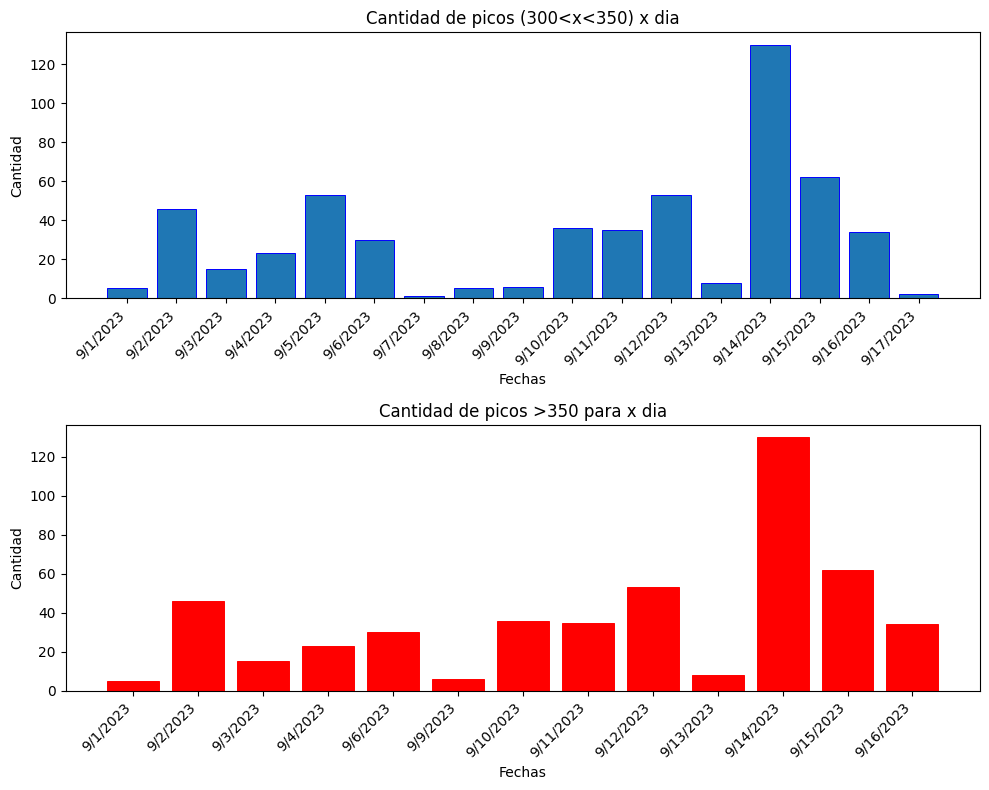

Cantidad de picos entre > 350:  [  5.  46.  15.  23.  30.   6.  36.  35.  53.   8. 130.  62.  34.]
valor mas alto : 
       indice       Date            Time  FQI171  PIR171
12890   12891  9/14/2023  9/14/2023 5:07  398.38   14.27
10947   10948  9/12/2023  9/12/2023 4:50  394.63   13.69


In [36]:
# @title FRECUENCIA DIARIA


arreglo_dias = []
arreglo_cuenta = []
arreglo_dias1 = []
arreglo_cuenta1 = []
dfcau = dfx[(dfx['FQI171'] >= 300) & (dfx['FQI171']<= 350)]
dfcau1 = dfx[dfx['FQI171'] > 350]
#
for i in range(len(dfcau['Date'])):
    fecha_actual = dfcau['Date'].values[i]

    # Verificar si la fecha actual es diferente de la siguiente fecha
    if i < len(dfcau['Date']) - 1 and fecha_actual != dfcau['Date'].values[i + 1]:
        arreglo_dias = np.append(arreglo_dias, fecha_actual)

# Agregar la última fecha si es diferente de la penúltima fecha (opcional)
if len(dfcau['Date']) > 1 and dfcau['Date'].values[-1] != dfcau['Date'].values[-2]:
    arreglo_dias = np.append(arreglo_dias, dfcau['Date'].values[-1])

for i in range(len(arreglo_dias)):
    conteo = len(dfcau[dfx['Date'] == arreglo_dias[i]])
    arreglo_cuenta = np.append(arreglo_cuenta, conteo)

#print(arreglo_dias)

for i in range(len(dfcau1['Date'])):
    fecha_actual = dfcau1['Date'].values[i]

    # Verificar si la fecha actual es diferente de la siguiente fecha
    if i < len(dfcau1['Date']) - 1 and fecha_actual != dfcau1['Date'].values[i + 1]:
        arreglo_dias1 = np.append(arreglo_dias1, fecha_actual)

# Agregar la última fecha si es diferente de la penúltima fecha (opcional)
if len(dfcau['Date']) > 1 and dfcau['Date'].values[-1] != dfcau['Date'].values[-2]:
    arreglo_dia1 = np.append(arreglo_dias1, dfcau['Date'].values[-1])

for i in range(len(arreglo_dias1)):
    conteo1 = len(dfcau[dfx['Date'] == arreglo_dias1[i]])
    arreglo_cuenta1 = np.append(arreglo_cuenta1, conteo1)

x=arreglo_dias
y=arreglo_cuenta
x1=arreglo_dias1
y1=arreglo_cuenta1
print("Cantidad de picos entre 300 y 350: ", arreglo_cuenta )
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 8))

ax.bar(x, y, width=0.8, edgecolor="blue", linewidth=0.7)
ax1.bar(x1, y1, width=0.8, edgecolor="red", linewidth=0.7, color="red")
ax.set_xticklabels(arreglo_dias, rotation=45, fontsize=10, horizontalalignment='right')
ax1.set_xticklabels(arreglo_dias1, rotation=45, fontsize=10, horizontalalignment='right')
ax.set_xlabel('Fechas')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de picos (300<x<350) x dia')
ax1.set_xlabel('Fechas')
ax1.set_ylabel('Cantidad')
ax1.set_title('Cantidad de picos >350 para x dia')

plt.tight_layout()

plt.show()

print("Cantidad de picos entre > 350: ", arreglo_cuenta1 )
print("valor mas alto : ")
print(dfcau1.nlargest(2,'FQI171') )





## ***Curvas de Caudal en intervalos diarios y parciales:***

---



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cantidad de items sampleados:  960
Fecha de la muestra:  10/16/2022 0:00:00 al 10/16/2022 23:58:29
sampleo cada 1 min 30 seg
Maximo Horno 6 con secusncia Tenova :  [7968.]
Maximo total con Horno 6 :  [17118.16]
Probabilidad >17000:  3
 


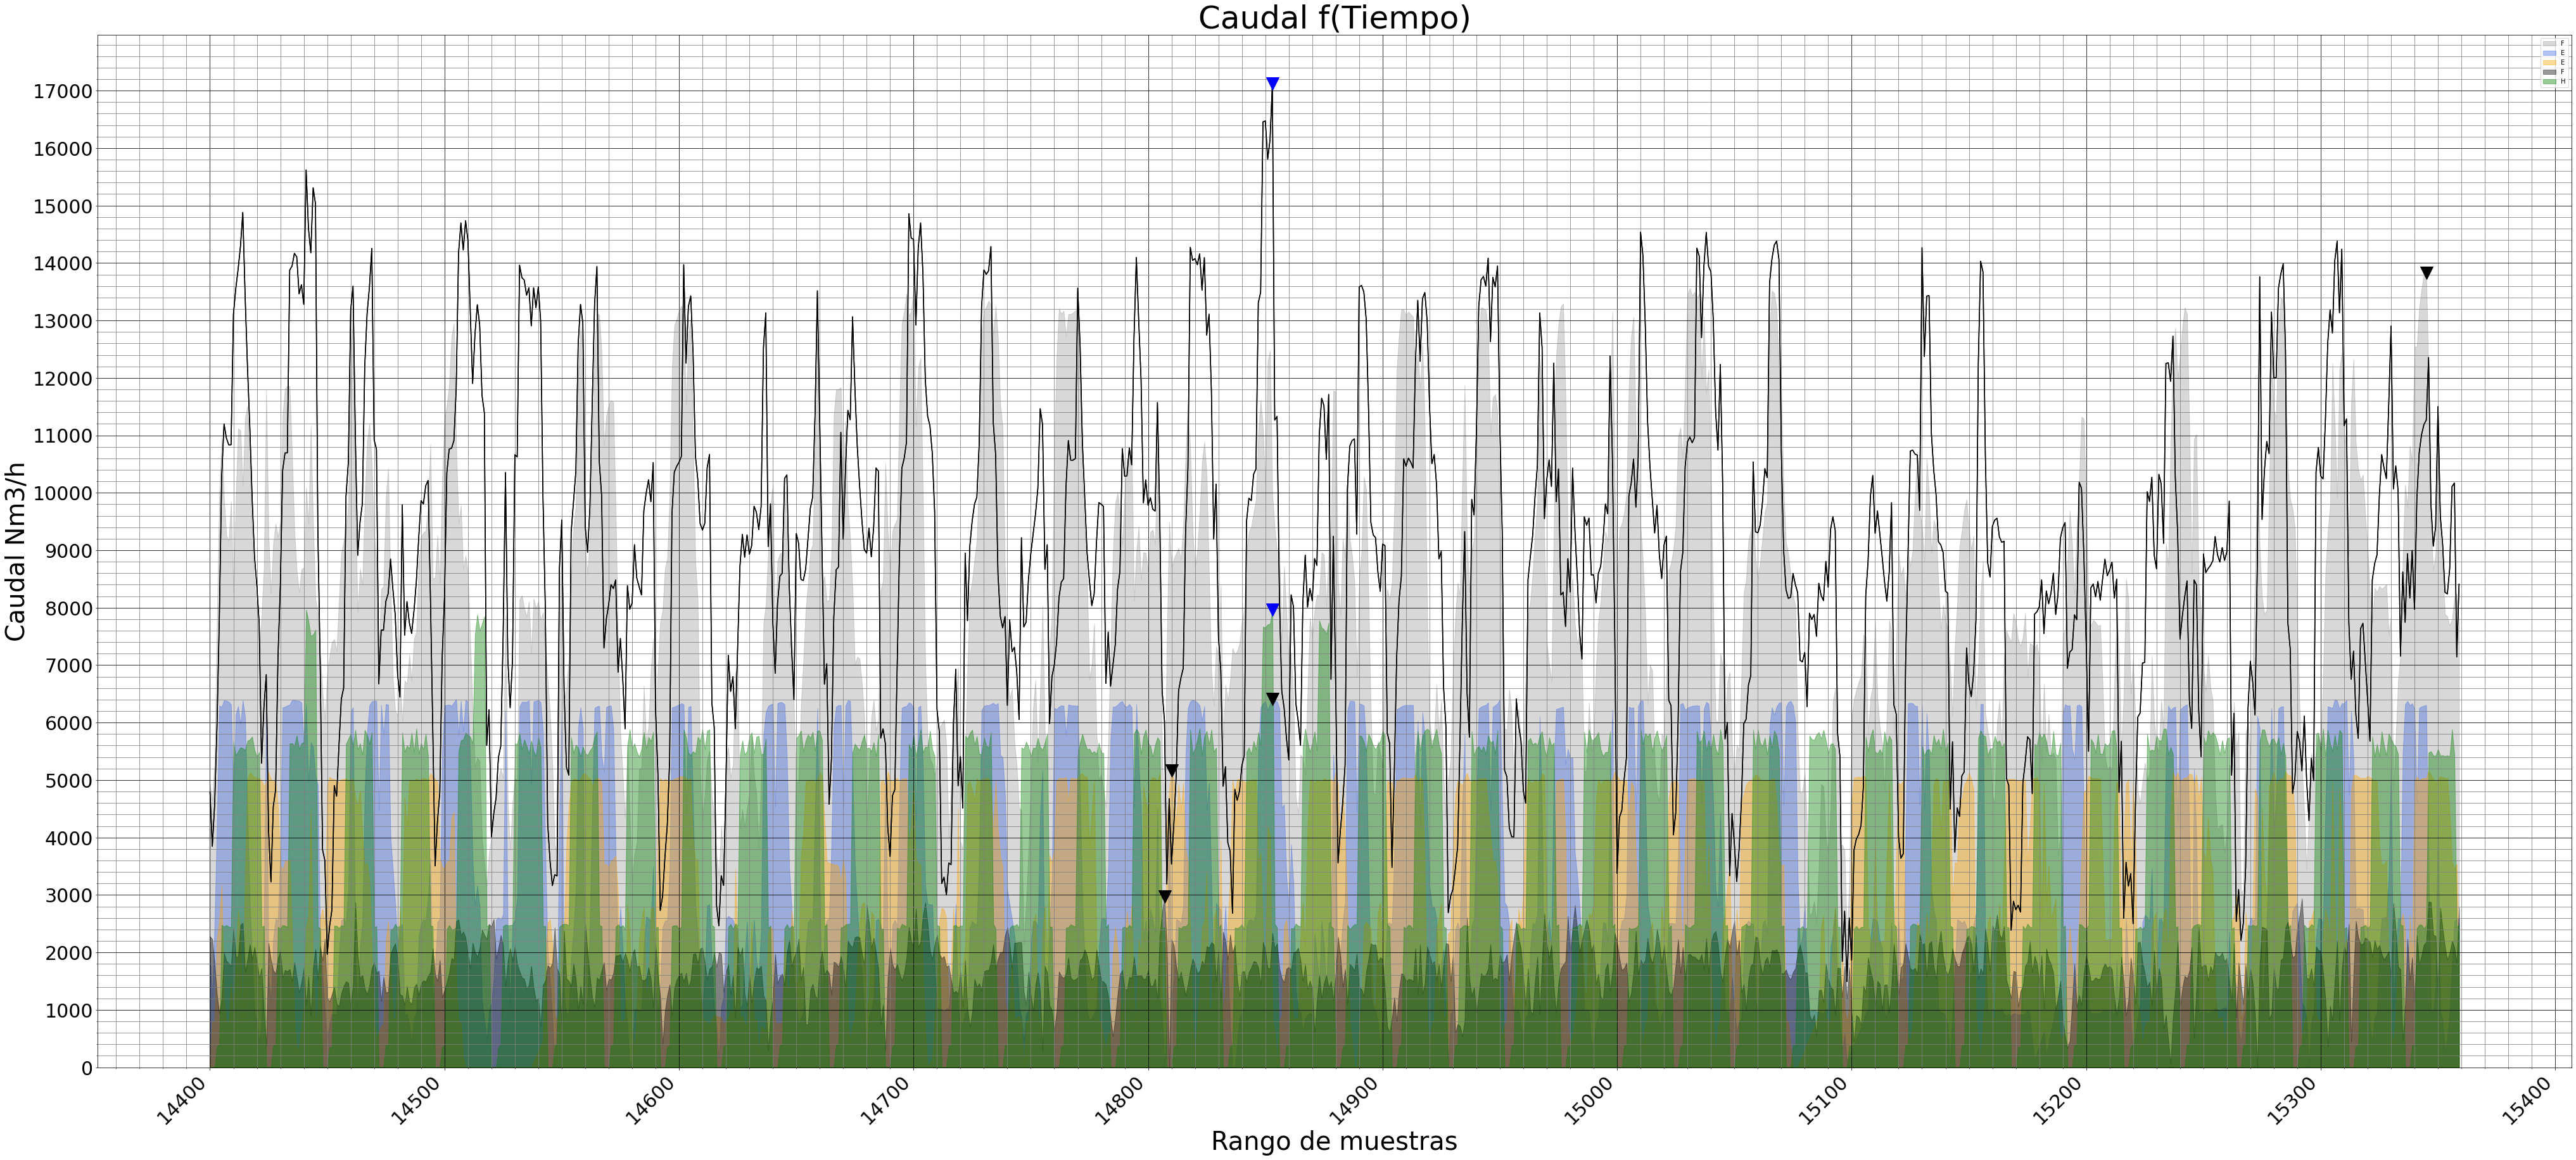

In [ ]:
from matplotlib.mathtext import MathtextBackend
from pandas._libs.writers import max_len_string_array
from prompt_toolkit.layout.dimension import max_layout_dimensions
from numpy.lib.twodim_base import triu_indices_from
#@title "Ejecutar Celda"
dfs=dfx.copy()

Celda = 'Date' #@param {type:"raw"}
Dia = '10/16/2022' #@param {type:"raw"}
#@markdown Simulación HORNO 6
#M_unitaria = False #@param {type:"boolean"}
Grafica = False #@param {type:"boolean"}
#@markdown Cantidad de iteraciones.
iteraciones = 100 #@param {type:"integer"}
Iterar = True #@param {type:"boolean"}
#@markdown Selección de graficas a visualizar
Total_Normal = True #@param {type:"boolean"}
EAF5 = True #@param {type:"boolean"}
EAF4 = True #@param {type:"boolean"}
Resto = True #@param {type:"boolean"}
PERFIL_TENOVA = True #@param {type:"boolean"}
PERFIL_TE_TOTAL = True #@param {type:"boolean"}
Pressure = False #@param {type:"boolean"}
con=0
Secuencia1=[40,3,2,5,7,5,2]
#Secuencia2=[1,133,54,213,280,200,80]

Aux1=dfs.loc[dfs.loc[:,Celda]==Dia]


#-------- Simulación de muestreo H06
def sampleo (sec):
    r=False
    s=[]
    con=0
    for j in range (sec[0]):
      for i in range(sec[1]):
          r=True
          while r :
              op=np.random.choice(2, 1 )
              if (op >=0 and op<=1):
                r=False
                s=np.array(np.append(s,op,axis=0))
      for i in range(sec[2]):
          r=True
          while r :
            op=np.random.choice(400, 1 )
            if (op >=350 and op<=400):
              r=False
              s=np.array(np.append(s,op,axis=0))
      for i in range(sec[3]):
        r=True
        while r :
          op=np.random.choice(2600, 1 )
          if (op >=2400 and op<=2500):
            r=False
            s=np.array(np.append(s,op,axis=0))
      for i in range(sec[4]):
        r=True
        while r :
          op=np.random.choice(6000, 1 )
          if (op >=5400 and op<=5900):
            r=False
            s=np.array(np.append(s,op,axis=0))
      u=np.random.choice(2 ,1,p=[0.9,0.1]) #posibilidad de picos.
      if u==0:  #si no es pico
        for i in range(sec[5]):
         r=True
         while r :
          op=np.random.choice(6000, 1 )
          if (op >=5400 and op<=5900):
            r=False
            s=np.array(np.append(s,op,axis=0))
      else:
        for i in range(sec[5]): #si es Pico de consumo
         r=True
         while r :
          op=np.random.choice(8000, 1 )
          if (op >=7500 and op<=8000):
            r=False
            s=np.array(np.append(s,op,axis=0))

      for i in range(sec[6]):
        r=True
        while r :
          op=np.random.choice(2600, 1 )
          if (op >=2400 and op<=2500):
            r=False
            s=np.array(np.append(s,op,axis=0))
      if u==1:
         con=con+1
    #print('cantidad de picos aletorios:',cont1)
    return s
#--------------------------------------------------------

if Iterar ==True:
 Prov=0
 for z in range(iteraciones):
    o=sampleo(Secuencia1)
    Aux1.loc[:,'HORNO_6']=o
    Aux1.loc[:,'TOT_HO6']=Aux1.loc[:,'FQI165']+Aux1.loc[:,'FQI173']+Aux1.loc[:,'FQI177']+Aux1.loc[:,'FQI151']+Aux1.loc[:,'HORNO_6']
    if z==0:
      Aux2=Aux1.copy()
      max=Aux1.nlargest(1,'TOT_HO6')
      if max['TOT_HO6'].values >= 17000:
         Prov=Prov+1
    else:
      maxA=Aux1.nlargest(1,'TOT_HO6')
      maxB=Aux2.nlargest(1,'TOT_HO6')
      if maxA['TOT_HO6'].values>= maxB['TOT_HO6'].values:
          Aux2=Aux1.copy()
          if maxA['TOT_HO6'].values>=17000:
             Prov=Prov+1

 Aux1=Aux2.copy()
else:
  o=sampleo(Secuencia1)
  Aux1.loc[:,'HORNO_6']=o
  Aux1.loc[:,'TOT_HO6']=Aux1.loc[:,'FQI165']+Aux1.loc[:,'FQI173']+Aux1.loc[:,'FQI177']+Aux1.loc[:,'FQI151']+Aux1.loc[:,'HORNO_6']



#-------- graficar
if Pressure==True:
  figB, (ax,ax1)= plt.subplots(2,1, figsize=(70,40))
else:
  figB, (ax)= plt.subplots(1, figsize=(70,30))

text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
#------- scatter
ax.set_title('Caudal f(Tiempo)',fontsize=50)
ax.set_xlabel(text2,fontsize=40)
ax.set_ylabel(text,fontsize=40)
labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels()

plt.setp(labels1,fontsize=30, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')

ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(200),)
ax.xaxis.set_major_locator(MultipleLocator(100),)
ax.xaxis.set_minor_locator(MultipleLocator(10),)

ax.axes.grid(True, which='minor',color='grey',axis='y')
ax.axes.grid(True, which='major',color='black',axis='y')
ax.axes.grid(True, which='minor',color='grey',axis='x')
ax.axes.grid(True, which='major',color='black',axis='x')

#---- graficar si

if Total_Normal==True:
   ax.stackplot(Aux1.index,Aux1['FQI161'],alpha=0.3,color='grey',labels="FQI161")
   Maximo=Aux1.nlargest(1,'FQI161')
   ax.plot(Maximo.index,Maximo.FQI161, 'v',markersize=20, color='black')

if EAF5==True:
   ax.stackplot(Aux1.index,Aux1['FQI165'],alpha=0.4,color='royalblue',labels="EAF5")
   Max5=Aux1.nlargest(1,'FQI165')
   ax.plot(Max5.index,Max5.FQI165, 'v',markersize=20, color='black')

if EAF4==True:
   ax.stackplot(Aux1.index,Aux1['FQI169'],alpha=0.4,color='orange',labels="EAF4")
   Max4=Aux1.nlargest(1,'FQI169')
   ax.plot(Max4.index,Max4.FQI169, 'v',markersize=20, color='black')

if Resto==True:
   ax.stackplot(Aux1.index,Aux1['FQI151'],alpha=0.4,color='black',labels="FQI151")
   MaxR=Aux1.nlargest(1,'FQI151')
   ax.plot(MaxR.index,MaxR.FQI151, 'v',markersize=20, color='black')

if PERFIL_TENOVA==True:
   ax.stackplot(Aux1.index,Aux1['HORNO_6'],alpha=0.4,color='green',labels="HORNO_6")
   Max6=Aux1.nlargest(1,'HORNO_6')
   ax.plot(Max6.index,Max6.HORNO_6, 'v',markersize=20, color='blue')

if PERFIL_TE_TOTAL==True:
   ax.plot(Aux1.index,Aux1['TOT_HO6'],Aux1.TOT_HO6,color='black')
   MaxT6=Aux1.nlargest(1,'TOT_HO6')
   ax.plot(MaxT6.index,MaxT6.TOT_HO6, 'v',markersize=20, color='blue')


#----- Plot
if Pressure==True:

  ax1.set_title('Presión f(Tiempo)',fontsize=50)
  ax1.set_xlabel(text2,fontsize=40)
  ax1.set_ylabel(text1,fontsize=40)
  ax1.plot(Aux1.index,Aux1['PIR161']) # Grafica
  labels = ax1.get_xticklabels()
  labels3 = ax1.get_yticklabels()
  plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')

  ax1.yaxis.set_minor_locator(MultipleLocator(0.125),)
  ax1.axes.grid(True, which='minor',color='grey',axis='y')
  ax1.axes.grid(True, which='major',color='black',axis='y')
  ax1.axes.grid(True, which='minor',color='grey',axis='x')
  ax1.axes.grid(True, which='major',color='black',axis='x')
  ax1.xaxis.set_major_locator(MultipleLocator(100),)
  ax1.xaxis.set_minor_locator(MultipleLocator(20),)

  plt.setp(labels3,fontsize=30, horizontalalignment='right')
  plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')

ax.legend(fontsize=10)
figB.show()

t=np.linspace(0, 960, num=960)

if Grafica==1:
    fig1, ax = plt.subplots(1, figsize=(70,40))
    ax.plot(t,o)
    ax.yaxis.set_major_locator(MultipleLocator(500),)
    ax.yaxis.set_minor_locator(MultipleLocator(10),)
    ax.xaxis.set_major_locator(MultipleLocator(10),)
    ax.xaxis.set_minor_locator(MultipleLocator(5),)

    #ax.axes.grid(True, which='minor',color='grey',axis='y')
    ax.axes.grid(True, which='major',color='black',axis='y')
    ax.axes.grid(True, which='minor',color='grey',axis='x')
    ax.axes.grid(True, which='major',color='black',axis='x')
    plt.show()



print('Cantidad de items sampleados: ', len(Aux1.index))
print('Fecha de la muestra: ',Aux1.Time.values[0], 'al',Aux1.Time.values[(len(Aux1.index)-1)])
print('sampleo cada 1 min 30 seg')
print('Maximo Horno 6 con secusncia Tenova : ',Max6.HORNO_6.values)
print('Maximo total con Horno 6 : ',MaxT6.TOT_HO6.values)
if Iterar==True:
 print('Probabilidad >17000: ',Prov)
print(' ')



